R语言的ggplot2绘图能力超强，python虽有matplotlib，但是语法臃肿，使用复杂，入门极难，seaborn的出现稍微改善了matplotlib代码量问题，但是定制化程度依然需要借助matplotlib，使用难度依然很大。

好消息是python中有一个plotnine包，可以实现绝大多数ggplot2的绘图功能，两者语法十分相似，R和Python的语法转换成本大大降低。


- plotnine文档
https://plotnine.readthedocs.io/en/latest/
- R语言ggplot2文档
https://ggplot2.tidyverse.org/reference/index.html

# 安装

In [ ]:
!pip3 install plotnine

# 准备数据

In [2]:
from plotnine.data import mpg

#dataframe
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


# 快速作图qplot
我们先直接看最简单好用的快速作图函数qplot(x, y, data)

- 横坐标displ
- 纵坐标cty
- 数据mpg

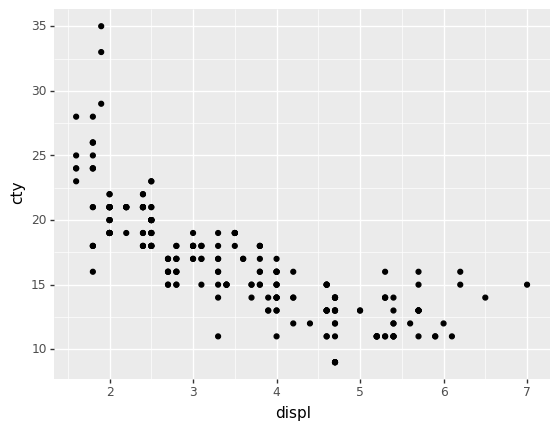

<ggplot: (322851325)>

In [8]:
from plotnine import qplot

qplot(x='displ', 
      y='cty',
      data=mpg)

# ggplot图层
qplot是快速作图函数，如果想让图更好看，进行私人订制，那么我们需要进行图层设计

首先设置ggplot图层（相当于买了一个高级画布），
- 数据mpg
- 横坐标x轴为displ
- 纵坐标y轴cty

在plotnine中，变量所对应的数据均可通过字段名调用

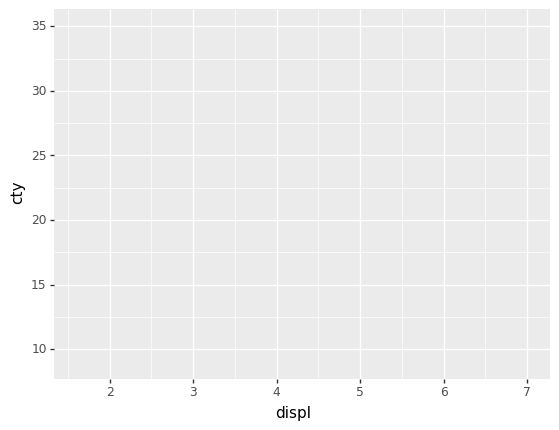

<ggplot: (321957793)>

In [4]:
from plotnine import ggplot, geom_point, aes

ggplot(aes(x='displ', y='cty'), mpg)

# 图层叠加
我们可以看到，已经绘制出一个空的ggplot图层，x轴为displ，y轴为cty。

接下来我们给这个图层上加上数据对应的散点，使用geom_point()直接追加在ggplot图层之上即可。

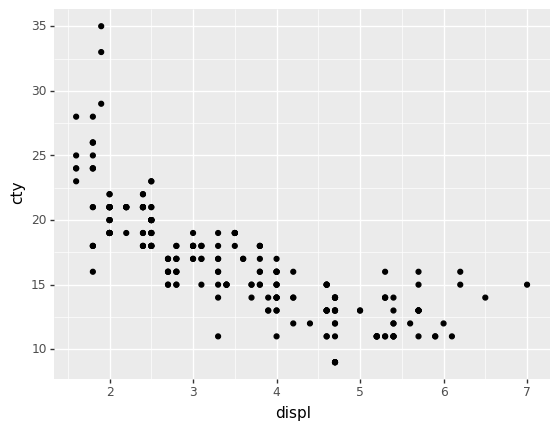

<ggplot: (322466061)>

In [5]:
(
    ggplot(aes(x='displ', y='cty'), mpg)
    + geom_point()
)

# color
在上图中，散点是没有区分每辆车的气缸数cyl。 

在geom_point()中，我们可以按照气缸数cyl分门别类，按照颜色显示出来

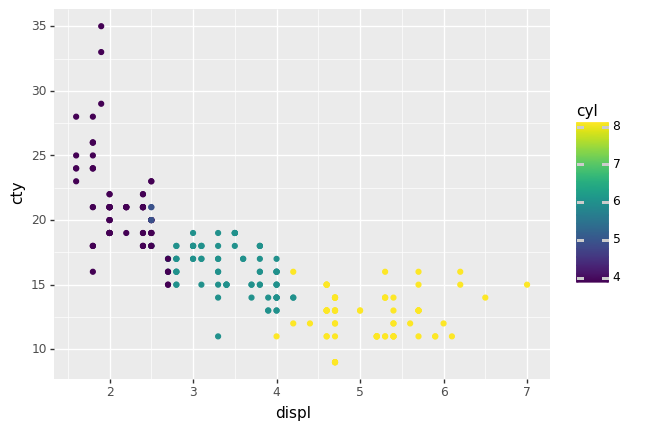

<ggplot: (323647173)>

In [16]:
(
    ggplot(aes(x='displ', y='cty'), mpg)
    + geom_point(aes(color='cyl'))
)

上图挺好看的，有时候需要绘制的字段是离散型数值，但是上色后可能不够明显，需要声明该字段为离散型。这时候用factor()来告诉plotnine，这个字段是离散型数值

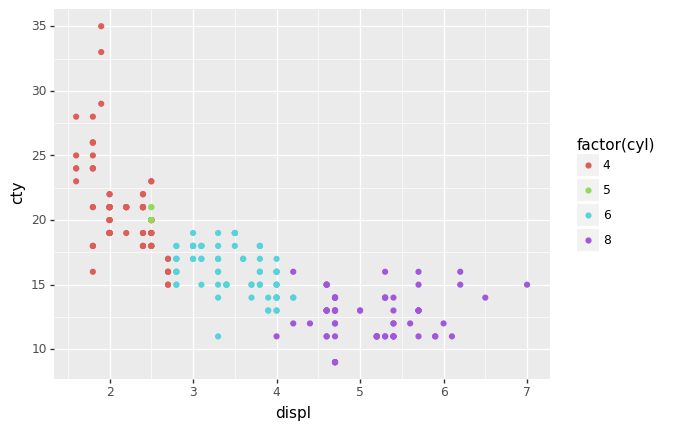

<ggplot: (321918425)>

In [6]:
(
    ggplot(aes(x='displ', y='cty'), mpg)
    + geom_point(aes(color='factor(cyl)')) 
)



# size

有时候为了增加可视化显示的维度数，还可以考虑加入点的大小size

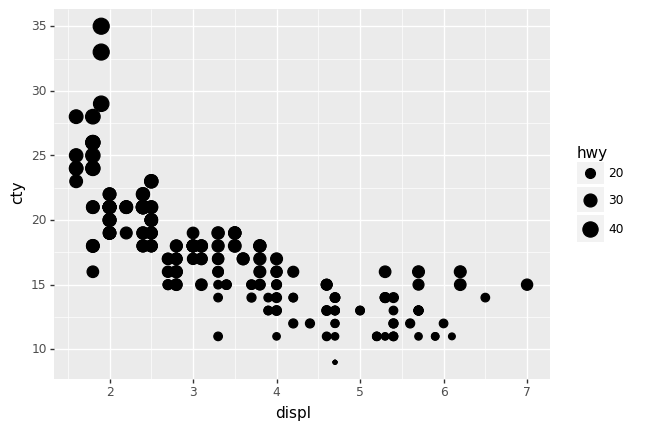

<ggplot: (323399013)>

In [10]:
(
    ggplot(aes(x='displ', y='cty'), mpg)
    + geom_point(aes(size='hwy'))
)

# 梯度色
如果你想自己设置颜色的梯度，可以通过scale_color_gradient设置

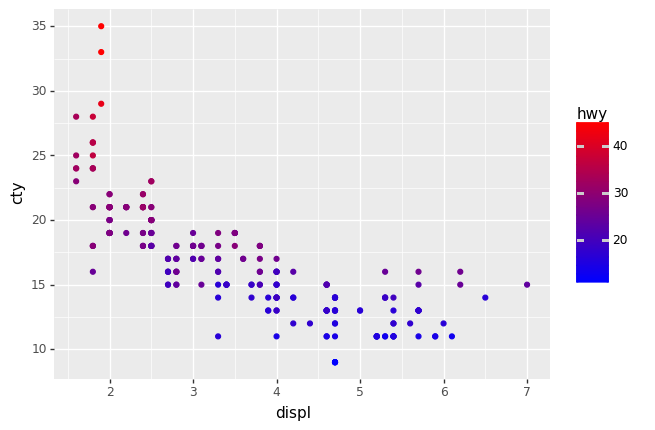

<ggplot: (323622897)>

In [17]:
from plotnine import scale_color_gradient

(
    ggplot(aes(x='displ', y='cty'), mpg)
    + geom_point(aes(color='hwy'))
    + scale_color_gradient(low='blue', high='red')
)


# 条形图
plotnine中可绘制的图有很多，刚刚已经讲了散点图，接下来我们看看plotnine中的条形图。

首先准备一下数据

In [2]:
import pandas as pd

df = pd.DataFrame({
    'variable': ['gender', 'gender', 'age', 'age', 'age', 'income', 'income', 'income', 'income'],
    'category': ['Female', 'Male', '1-24', '25-54', '55+', 'Lo', 'Lo-Med', 'Med', 'High'],
    'value': [60, 40, 50, 30, 20, 10, 25, 25, 40],
})
df['variable'] = pd.Categorical(df['variable'], categories=['gender', 'age', 'income'])
df['category'] = pd.Categorical(df['category'], categories=df['category'])

df

,variable,category,value
0,gender,Female,60
1,gender,Male,40
2,age,1-24,50
3,age,25-54,30
4,age,55+,20
5,income,Lo,10
6,income,Lo-Med,25
7,income,Med,25
8,income,High,40


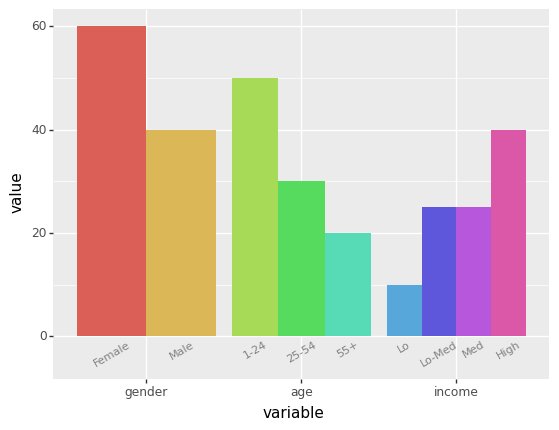

<ggplot: (334727813)>

In [1]:
from plotnine import ggplot, aes, geom_text, position_dodge, geom_point

#调整文本位置
dodge_text = position_dodge(width=0.9)                              # new

(
    ggplot(df, aes(x='variable', 
                   y='value', 
                   fill='category')) #类别填充颜色
    + geom_col(position='dodge', 
               show_legend=False)   # modified
    + geom_text(aes(y=-.5, label='category'),                          # new
                position=dodge_text,
                color='gray',  #文本颜色
                size=8,   #字号
                angle=30, #文本的角度
                va='top')
    
 + lims(y=(-5, 60))                                                 # new
)

In [21]:
from plotnine.data import economics_long

economics_long.head()

,date,variable,value,value01
0,1967-07-01,pce,507.4,0.000000
1,1967-08-01,pce,510.5,0.000266
2,1967-09-01,pce,516.3,0.000764
3,1967-10-01,pce,512.9,0.000472
4,1967-11-01,pce,518.1,0.000918


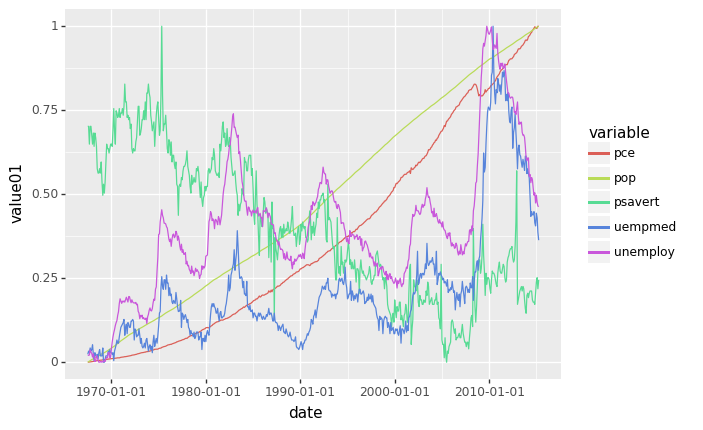

<ggplot: (334895445)>

In [23]:
from plotnine import ggplot, aes, geom_line

(
    ggplot(economics_long, aes(x='date', y='value01', color='variable'))
    + geom_line()
)

plotnine目前已经支持绝大多数ggplot2，但是文档方面没有ggplot2全，所以学习plotnine时可以参考ggplot2。


- plotnine文档
https://plotnine.readthedocs.io/en/latest/
- R语言ggplot2文档
https://ggplot2.tidyverse.org/reference/index.html